In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [102]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [116]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
train.shape

(891, 12)

In [105]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [106]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [107]:
import seaborn as sns

0 549
1 342


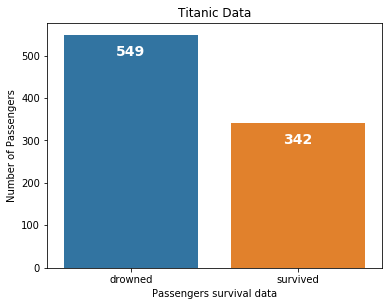

In [108]:
#fix figure size
plt.figure(figsize=(6,4.5))

#do a countplot of the survived column
ax = sns.countplot(x='Survived', data=train)
plt.xticks(np.arange(2), ['drowned', 'survived'])
plt.xlabel("Passengers survival data")
plt.ylabel("Number of Passengers")
plt.title("Titanic Data")

#add total number as labels

labels = (train['Survived'].value_counts())

for i,v in enumerate(labels):
    print(i, v)
    ax.text(i, v-50, str(v), horizontalalignment='center', size=14, color='w', fontweight='bold')

plt.show()


In [109]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [110]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


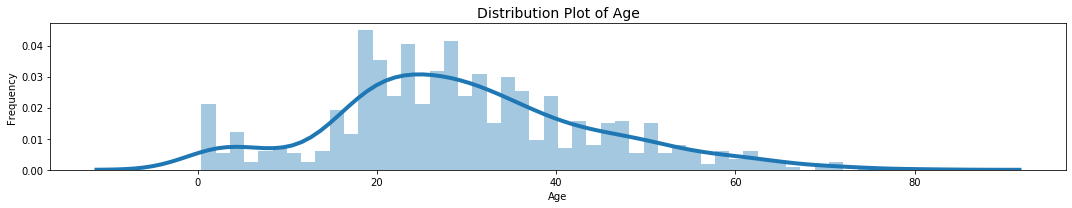

In [151]:
# Let's explore the age
# distplot (how age is distributed.)

plt.figure(figsize=(15,3))

#plot a univariate distribution of age
sns.distplot(train[train['Age']>0]['Age'], kde_kws={"lw":4}, bins=50)

plt.title('Distribution Plot of Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()

pd.DataFrame(train['Age'].describe()).transpose()

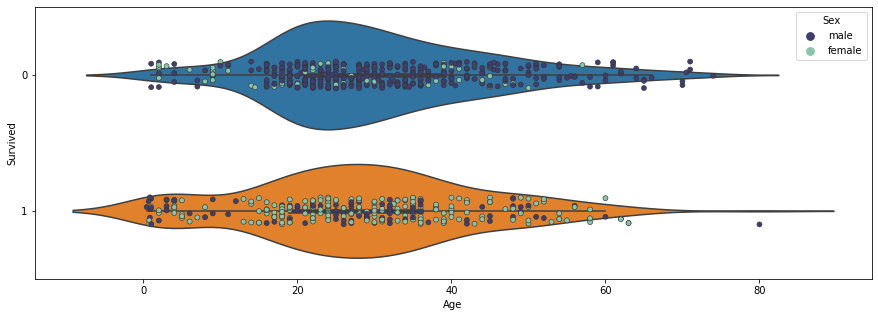

In [152]:
#using a boxplot to see if age had anything to do with survival.

plt.figure(figsize=(15,5))
sns.violinplot(y='Survived', x='Age', data=train, fliersize=0, orient='h')

sns.stripplot(y='Survived', x="Age", hue='Sex', data=train, orient='h', linewidth=0.6, palette=['#3f3e6fd1', '#85c6a9'])

In [153]:
pd.DataFrame(train.groupby('Survived')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [154]:
train[train['Age'] == max(train['Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [156]:
train[train['Age']==min(train['Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


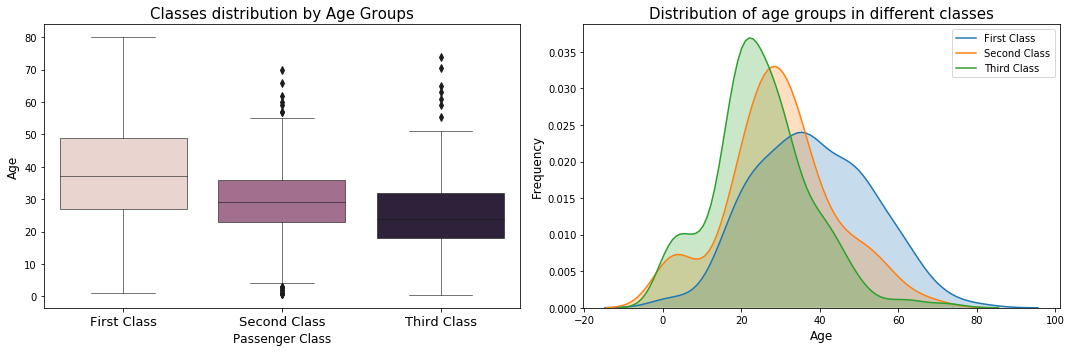

In [201]:
#Age by class
plt.figure(figsize=(15,5))
#set a palette
palette = sns.cubehelix_palette(n_colors=3, start=3)

plt.subplot(1,2,1)
sns.boxplot(x='Pclass', y='Age', data=train, linewidth=0.6, palette=palette )
plt.xticks(np.arange(3), ['First Class', 'Second Class', 'Third Class'], fontsize=13)
plt.title('Classes distribution by Age Groups', fontsize=15)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Age', fontsize=12)

plt.subplot(1,2,2)
#Create categories for age and class
pclass_1 = train[(train['Age']>0) & (train['Pclass']==1)]
pclass_2 = train[(train['Age']>0) & (train['Pclass']==2)]
pclass_3 = train[(train['Age']>0) & (train['Pclass']==3)]

sns.kdeplot(pclass_1['Age'], shade=1, label='First Class')
sns.kdeplot(pclass_2['Age'], shade=1, label='Second Class')
sns.kdeplot(pclass_3['Age'], shade=1, label='Third Class')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of age groups in different classes', fontsize=15)
plt.tight_layout()


In [212]:
pd.DataFrame(train.groupby('Pclass')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


(-5, 80)

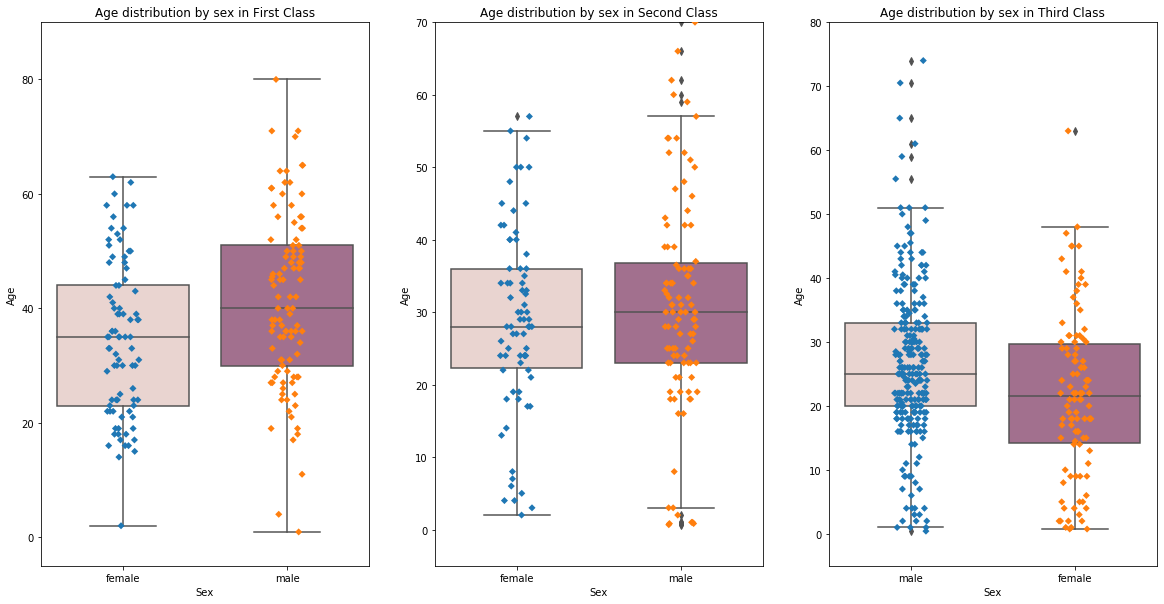

In [267]:
# Time for some age distribution by class.
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.boxplot(x='Sex', y='Age', data=pclass_1, palette=palette)
sns.stripplot(x='Sex', y='Age',marker="D",edgecolor="gray", data=pclass_1)
plt.title('Age distribution by sex in First Class')
plt.ylim(-5,90)

plt.subplot(1,3,2)
sns.boxplot(x='Sex', y='Age', data=pclass_2, palette=palette)
sns.stripplot(x='Sex', y='Age',marker="D",edgecolor="gray", data=pclass_2)
plt.title('Age distribution by sex in Second Class')
plt.ylim(-5,70)

plt.subplot(1,3,3)
sns.boxplot(x='Sex', y='Age', data=pclass_3, palette=palette)
sns.stripplot(x='Sex', y='Age',marker="D",edgecolor="gray", data=pclass_3)
plt.title('Age distribution by sex in Third Class')
plt.ylim(-5,80)

In [263]:
age_class_1 = pd.DataFrame(pclass_1.groupby('Sex')['Age'].describe())
age_class_2 = pd.DataFrame(pclass_2.groupby('Sex')['Age'].describe())
age_class_3 = pd.DataFrame(pclass_3.groupby('Sex')['Age'].describe())

pd.concat([age_class_1, age_class_2, age_class_3], axis=0, sort=False, keys=['First', 'Second', 'Third'])

count       mean        std   min     25%   50%    75%   max
       Sex                                                                 
First  female   85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
       male    101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
Second female   74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
       male     99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
Third  female  102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
       male    253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0

SyntaxError: invalid syntax (<ipython-input-264-b388489a1ea5>, line 1)